# Prediction using supervised ml

In this task we will predict the percantage of an student based on the no. of study hours. This is a simple linear regression
task as it involves just 2 variables.

## First method

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load dataset
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.shape

(25, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data visualization

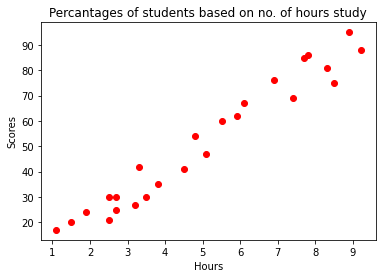

In [47]:
plt.title('Percantages of students based on no. of hours study')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(df.Hours,df.Scores,color='red',marker='o')
plt.show()

In [15]:
X=df.drop('Scores',axis='columns')
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [17]:
Y=df.Scores
Y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [16]:
from sklearn import linear_model

In [18]:
model=linear_model.LinearRegression()
model.fit(X,Y)

LinearRegression()

In [19]:
model.intercept_

2.48367340537321

In [20]:
model.coef_

array([9.77580339])

In [22]:
model.predict([[9]])

C:\Users\farma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([90.46590392])

In [23]:
model.predict([[]])

C:\Users\farma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92.90985477])

## 2nd method

### Preparing the data for the Machine learning

In [26]:
x=df.iloc[:,:-1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [27]:
y=df.iloc[:,1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Training the Model

we split the dataset into test and train data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression

In [33]:
lm=LinearRegression()

In [34]:
lm.fit(x_train,y_train)

LinearRegression()

In [36]:
print("Intercept : ",lm.intercept_)
print("coefficient : ",lm.coef_)

Intercept :  2.018160041434683
coefficient :  [9.91065648]


#### plotting the Regression Line

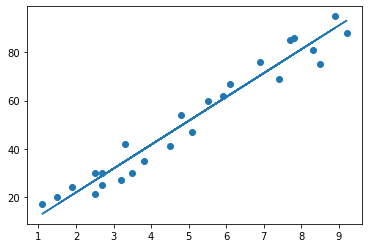

In [38]:
reg_line=lm.coef_*x+lm.intercept_

#plotting for the test data
plt.scatter(x,y)
plt.plot(x,reg_line)
plt.show()

### Making Prediction

In [39]:
print(x_test)
y_pred=lm.predict(x_test)
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Actual vs Predicted Values

In [40]:
df1=pd.DataFrame({'Actual_values':y_test, 'Predicted_values':y_pred})
df1

,Actual_values,Predicted_values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Accuracy of the model and the various metrices in order to evaluate the model

In [41]:
lm.score(x,y)

0.9526947647057274

In [42]:
from sklearn import metrics

In [43]:
print("mean absolute error :",metrics.mean_absolute_error(y_test,y_pred))
print("mean square error :",metrics.mean_squared_error(y_test,y_pred))
print("root mean sqaure error :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error : 4.183859899002975
mean square error : 21.5987693072174
root mean sqaure error : 4.6474476121003665


#### Predicting the score of the student who studies for 9.25 hrs/day

In [45]:
hrs=float(input('enter no. of hrs studied by a student per day'))
lm.predict([[hrs]])

enter no. of hrs studied by a student per day9.25


array([93.69173249])

### Conclusion

According to the linear regression model the students who studies 9.25 hrs/day, will score 93.69%